In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing, decomposition

# Applying SVD
#### NOTE: All of the steps after preprocessing are same as learnt from the third assignment.

## Loading the diabetes dataset

In [2]:
filePath = "../Dataset/diabetic_data.csv"
# May not need this.
diabetes_cols = ['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted']

diabetes_df = pd.read_csv(filePath, sep=",")
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Selecting the following columns and droping rest of the columns
 `age` 

 `admission_type_id`
 
 `discharge_disposition_id`
 
 `time_in_hospital` 

`num_lab_procedures` 

`num_medications` 

`diag_1` 

`diag_2` 

`diag_3` 

`number_diagnoses`


In [3]:
diabetes_df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 
                  'race', 'gender',
                  'admission_source_id',
                  'num_procedures',
                  'number_outpatient','number_emergency','number_inpatient',
                  'max_glu_serum', 'A1Cresult', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone',
                  'acetohexamide', 'repaglinide' , 'nateglinide', 'chlorpropamide', 'metformin', 'glipizide',
                  'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
                  'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                  'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed', 'insulin', 'change'
                 ], 1, inplace=True)
diabetes_df.head()

,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,[0-10),6,25,1,41,1,250.83,?,?,1,NO
1,[10-20),1,1,3,59,18,276,250.01,255,9,>30
2,[20-30),1,1,2,11,13,648,250,V27,6,NO
3,[30-40),1,1,2,44,16,8,250.43,403,7,NO
4,[40-50),1,1,1,51,8,197,157,250,5,NO


## Droping numerical features

## Converting the diag_1, diag_2, diag_3 values using their ICD9 values to String

In [4]:
# Changed the 'diag_1' based on ICD9 values to one of 'Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms'
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].str.contains('250'), 'Diabetes', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','785']), 'Circulatory', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','49','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','786']), 'Respiratory', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','55','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','787']), 'Digestive', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['800','801','802','803','804','805','806','807','808','809','810','811','812','813','814','815','816','817','818','819','820','821','822','823','824','825','826','827','828','829','830','81','832','833','834','835','836','837','838','839','840','841','842','843','844','845','846','847','848','849','850','851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867','868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884','885','886','887','888','889','890','891','892','893','894','895','896','897','898','899','900','901','902','903','904','905','906','907','908','909','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','26','927','928','929','930','931','932','933','934','935','936','937','938','939','940','941','942','943','944','945','946','947','948','949','950','951','952','953','954','955','956','957','958','959','960','961','962','963','964','965','966','967','968','969','970','971','972','973','974','975','976','977','978','979','980','981','982','983','984','985','986','987','988','989','990','991','992','993','994','995','996','997','998','999']), 'Injury', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739']), 'Musculoskeletal', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','61','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','788']), 'Genitourinary', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','17','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238']), 'Neoplasms', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms']), diabetes_df['diag_1'], 'Other')


In [5]:
# Changed the 'diag_2' based on ICD9 values to one of 'Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms'
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].str.contains('250'), 'Diabetes', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','785']), 'Circulatory', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','49','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','786']), 'Respiratory', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','55','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','787']), 'Digestive', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['800','801','802','803','804','805','806','807','808','809','810','811','812','813','814','815','816','817','818','819','820','821','822','823','824','825','826','827','828','829','830','81','832','833','834','835','836','837','838','839','840','841','842','843','844','845','846','847','848','849','850','851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867','868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884','885','886','887','888','889','890','891','892','893','894','895','896','897','898','899','900','901','902','903','904','905','906','907','908','909','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','26','927','928','929','930','931','932','933','934','935','936','937','938','939','940','941','942','943','944','945','946','947','948','949','950','951','952','953','954','955','956','957','958','959','960','961','962','963','964','965','966','967','968','969','970','971','972','973','974','975','976','977','978','979','980','981','982','983','984','985','986','987','988','989','990','991','992','993','994','995','996','997','998','999']), 'Injury', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739']), 'Musculoskeletal', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','61','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','788']), 'Genitourinary', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','17','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238']), 'Neoplasms', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms']), diabetes_df['diag_2'], 'Other')


In [6]:
# Changed the 'diag_3' based on ICD9 values to one of 'Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms'
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].str.contains('250'), 'Diabetes', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','785']), 'Circulatory', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','49','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','786']), 'Respiratory', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','55','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','787']), 'Digestive', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['800','801','802','803','804','805','806','807','808','809','810','811','812','813','814','815','816','817','818','819','820','821','822','823','824','825','826','827','828','829','830','81','832','833','834','835','836','837','838','839','840','841','842','843','844','845','846','847','848','849','850','851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867','868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884','885','886','887','888','889','890','891','892','893','894','895','896','897','898','899','900','901','902','903','904','905','906','907','908','909','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','26','927','928','929','930','931','932','933','934','935','936','937','938','939','940','941','942','943','944','945','946','947','948','949','950','951','952','953','954','955','956','957','958','959','960','961','962','963','964','965','966','967','968','969','970','971','972','973','974','975','976','977','978','979','980','981','982','983','984','985','986','987','988','989','990','991','992','993','994','995','996','997','998','999']), 'Injury', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739']), 'Musculoskeletal', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','61','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','788']), 'Genitourinary', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','17','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238']), 'Neoplasms', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms']), diabetes_df['diag_3'], 'Other')
diabetes_df.head()

,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,[0-10),6,25,1,41,1,Diabetes,Other,Other,1,NO
1,[10-20),1,1,3,59,18,Other,Diabetes,Other,9,>30
2,[20-30),1,1,2,11,13,Other,Diabetes,Other,6,NO
3,[30-40),1,1,2,44,16,Other,Diabetes,Circulatory,7,NO
4,[40-50),1,1,1,51,8,Neoplasms,Neoplasms,Diabetes,5,NO


## Replacing the following Categorical features to numbers

In [7]:
# age
age = diabetes_df.iloc[:,diabetes_df.columns.get_loc("age")].str.replace('?', '[70-80)')
distinct_age = age.unique()
diabetes_df.age = np.array([np.where(distinct_age == i)[0][0] for i in age])

# diag_1
diag_1 = diabetes_df.iloc[:,diabetes_df.columns.get_loc("diag_1")].str.replace('?', 'Other')
distinct_diag_1 = diag_1.unique()
diabetes_df.diag_1 = np.array([np.where(distinct_diag_1 == i)[0][0] for i in diag_1])

# diag_2
diag_2 = diabetes_df.iloc[:,diabetes_df.columns.get_loc("diag_2")].str.replace('?', 'Other')
distinct_diag_2 = diag_2.unique()
diabetes_df.diag_2 = np.array([np.where(distinct_diag_2 == i)[0][0] for i in diag_2])

# diag_3
diag_3 = diabetes_df.iloc[:,diabetes_df.columns.get_loc("diag_3")].str.replace('?', 'Other')
distinct_diag_3 = diag_3.unique()
diabetes_df.diag_3 = np.array([np.where(distinct_diag_3 == i)[0][0] for i in diag_3])

# readmitted
readmitted = diabetes_df.iloc[:,diabetes_df.columns.get_loc("readmitted")].str.replace('?', 'NO')
readmitted = readmitted.str.replace('>30', 'NO')
distinct_readmitted = readmitted.unique()
diabetes_df.readmitted =readmitted

diabetes_df.head()

,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,0,6,25,1,41,1,0,0,0,1,NO
1,1,1,1,3,59,18,1,1,0,9,NO
2,2,1,1,2,11,13,1,1,0,6,NO
3,3,1,1,2,44,16,1,1,1,7,NO
4,4,1,1,1,51,8,2,2,2,5,NO


## Split on input data and class label

In [8]:
# Let's split on input data/class label
# In an unsupervised setting, we might not have the class label,
# or use it only for final evaluation
X = diabetes_df.iloc[:,0:-1]
Y = diabetes_df.iloc[:, -1]
#diabetes_df = None

## Supervised Visulaization of the selected columns 

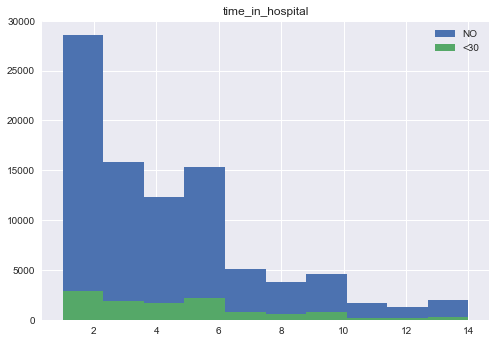

In [9]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].time_in_hospital for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('time_in_hospital')
plt.legend(loc='upper right')
#plt.show()

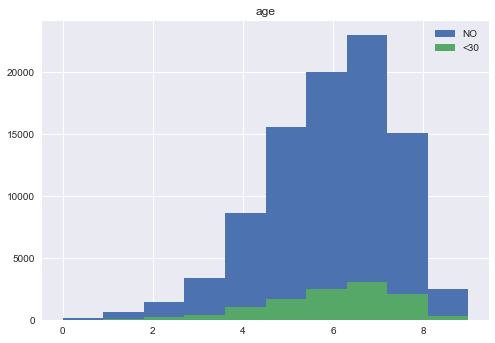

In [10]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].age for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('age')
plt.legend(loc='upper right')
#plt.show()

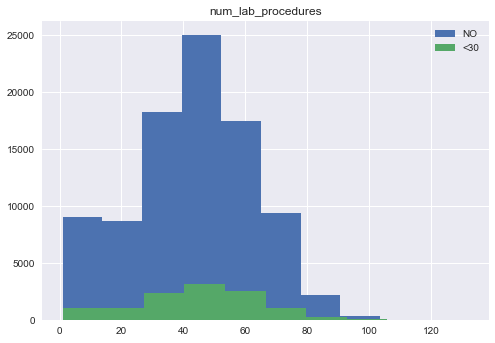

In [11]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].num_lab_procedures for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('num_lab_procedures')
plt.legend(loc='upper right')
#plt.show()

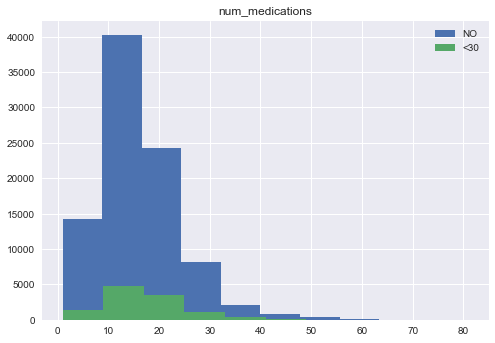

In [12]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].num_medications for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('num_medications')
plt.legend(loc='upper right')
#plt.show()

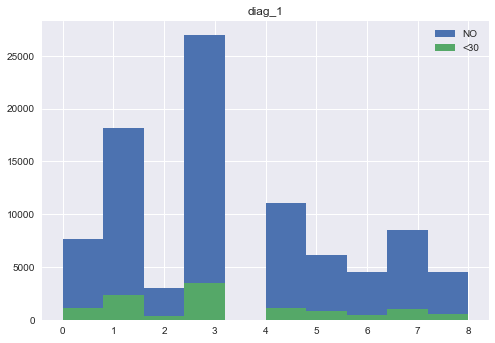

In [13]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].diag_1 for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('diag_1')
plt.legend(loc='upper right')
#plt.show()

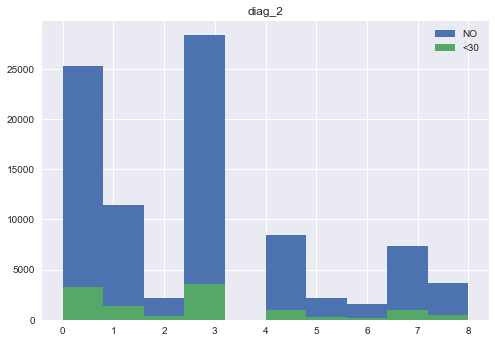

In [14]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].diag_2 for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('diag_2')
plt.legend(loc='upper right')
#plt.show()

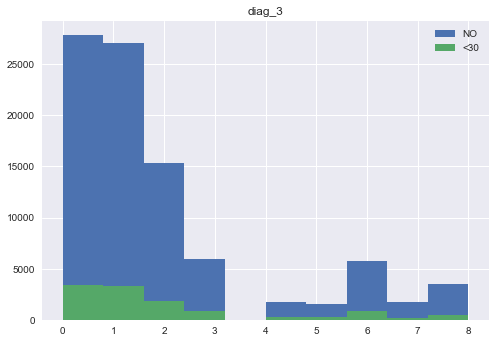

In [15]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].diag_3 for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('diag_3')
plt.legend(loc='upper right')
#plt.show()

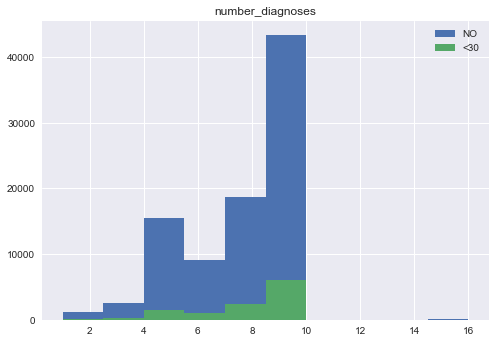

In [16]:
for readmitted_val in distinct_readmitted:
    plt.hist([X.loc[p].number_diagnoses for p in Y[Y.isin([readmitted_val])].index], label=readmitted_val)
    
plt.title('number_diagnoses')
plt.legend(loc='upper right')
#plt.show()

## Preprocessing with `scikit-learn`

In [17]:
X_std = preprocessing.StandardScaler().fit_transform(X)

In [18]:
X_std = pd.DataFrame(X_std, columns=list(X))

In [19]:
X_std.describe()

,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses
count,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05
mean,-4.706383e-15,-1.684634e-13,6.726046e-15,2.357310e-14,3.243938e-16,-2.183720e-14,-3.484535e-15,1.148034e-14,-8.239507e-15,1.284175e-13
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-3.824600e+00,-7.084607e-01,-5.143125e-01,-1.137649e+00,-2.139630e+00,-1.848268e+00,-1.477460e+00,-1.104772e+00,-8.455671e-01,-3.321596e+00
25%,-6.879862e-01,-7.084607e-01,-5.143125e-01,-8.026506e-01,-6.147950e-01,-7.409197e-01,-1.033632e+00,-1.104772e+00,-8.455671e-01,-7.357332e-01
50%,-6.066351e-02,-7.084607e-01,-5.143125e-01,-1.326548e-01,4.596660e-02,-1.257264e-01,-1.459758e-01,1.658140e-01,-3.849166e-01,2.986119e-01
75%,5.666592e-01,6.752434e-01,5.385430e-02,5.373411e-01,7.067282e-01,4.894670e-01,7.416804e-01,5.893427e-01,7.573398e-02,8.157845e-01
max,1.821305e+00,4.134504e+00,4.599189e+00,3.217324e+00,4.518815e+00,7.994826e+00,2.073165e+00,2.283458e+00,2.839637e+00,4.435992e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001687A4CEAC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000168003C6F28>]], dtype=object)

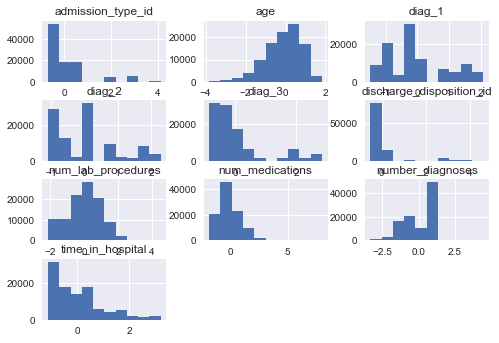

In [20]:
X_std.hist()

## Computing the Covariance Matrix

In [21]:
np_X_std_cov = np.cov(X_std.transpose())
np_X_std_cov

array([[ 1.00000983, -0.00720867,  0.11432414,  0.10751597,  0.02077052,
         0.04184744,  0.12271062,  0.11600567,  0.03814191,  0.24259988],
       [-0.00720867,  1.00000983,  0.08348407, -0.01249978, -0.14371486,
         0.07953571,  0.01617161, -0.00546663,  0.00560784, -0.11712687],
       [ 0.11432414,  0.08348407,  1.00000983,  0.16274916,  0.02341507,
         0.10875414,  0.00302207,  0.00196153,  0.00857067,  0.04689143],
       [ 0.10751597, -0.01249978,  0.16274916,  1.00000983,  0.3184533 ,
         0.46614   , -0.04325822,  0.04556248,  0.05671243,  0.22018844],
       [ 0.02077052, -0.14371486,  0.02341507,  0.3184533 ,  1.00000983,
         0.26816326, -0.01187498,  0.04499927,  0.04266911,  0.15277488],
       [ 0.04184744,  0.07953571,  0.10875414,  0.46614   ,  0.26816326,
         1.00000983,  0.05498249,  0.08258465,  0.04701449,  0.26152868],
       [ 0.12271062,  0.01617161,  0.00302207, -0.04325822, -0.01187498,
         0.05498249,  1.00000983,  0.05379251

In [22]:
n = X_std.shape

In [23]:
X_std_cov = (1/(n[0] - 1)) * (X_std.transpose().values @ X_std.values)

# check that your covariance = NumPy above
X_std_cov

array([[ 1.00000983, -0.00720867,  0.11432414,  0.10751597,  0.02077052,
         0.04184744,  0.12271062,  0.11600567,  0.03814191,  0.24259988],
       [-0.00720867,  1.00000983,  0.08348407, -0.01249978, -0.14371486,
         0.07953571,  0.01617161, -0.00546663,  0.00560784, -0.11712687],
       [ 0.11432414,  0.08348407,  1.00000983,  0.16274916,  0.02341507,
         0.10875414,  0.00302207,  0.00196153,  0.00857067,  0.04689143],
       [ 0.10751597, -0.01249978,  0.16274916,  1.00000983,  0.3184533 ,
         0.46614   , -0.04325822,  0.04556248,  0.05671243,  0.22018844],
       [ 0.02077052, -0.14371486,  0.02341507,  0.3184533 ,  1.00000983,
         0.26816326, -0.01187498,  0.04499927,  0.04266911,  0.15277488],
       [ 0.04184744,  0.07953571,  0.10875414,  0.46614   ,  0.26816326,
         1.00000983,  0.05498249,  0.08258465,  0.04701449,  0.26152868],
       [ 0.12271062,  0.01617161,  0.00302207, -0.04325822, -0.01187498,
         0.05498249,  1.00000983,  0.05379251

## Eigendecomposition vs SVD

In [24]:
eigvals, eigvecs = np.linalg.eig(X_std_cov)

print("Values:", eigvals)
print()
print("Vectors:", eigvecs)

Values: [ 2.00519253  0.48853518  1.24121624  1.16835813  0.63840639  0.73307897
  0.84316695  1.00532461  0.9345359   0.94228337]

Vectors: [[ 0.24008529 -0.20450915  0.54154171 -0.04459551 -0.21825747 -0.54995916
  -0.25181252  0.42591395 -0.10184482  0.00169633]
 [-0.05611264  0.15997117  0.03810307 -0.73042296  0.3487557  -0.25154804
  -0.31369851 -0.29107     0.23998111  0.10326983]
 [ 0.19139658 -0.0548502   0.03043738 -0.52258042  0.17242309  0.21790449
   0.55854216  0.38096949 -0.38056202  0.08482596]
 [ 0.51912162  0.62984492 -0.27256339 -0.11728368 -0.49065658 -0.06090142
  -0.03124772 -0.00494881 -0.00231396 -0.01739902]
 [ 0.39227617 -0.04109114 -0.3110207   0.27662708  0.52477049 -0.53826802
   0.27254732 -0.07715622  0.01514532 -0.15997961]
 [ 0.5038739  -0.67639614 -0.20053942 -0.18473145 -0.19564924  0.24499437
  -0.14418931 -0.19163733  0.21001779 -0.11972391]
 [ 0.06254945  0.15495955  0.47896398 -0.0548109   0.01154995  0.12391961
   0.228325   -0.24340707  0.117825

In [25]:
svd_u,svd_s,svd_v = np.linalg.svd(X_std_cov.transpose())

print("U:", svd_u)
print()
print("S:", svd_s)
print()
print("V:", svd_v)

U: [[-0.24008529  0.54154171 -0.04459551 -0.42591395  0.00169633 -0.10184482
   0.25181252  0.54995916  0.21825747  0.20450915]
 [ 0.05611264  0.03810307 -0.73042296  0.29107     0.10326983  0.23998111
   0.31369851  0.25154804 -0.3487557  -0.15997117]
 [-0.19139658  0.03043738 -0.52258042 -0.38096949  0.08482596 -0.38056202
  -0.55854216 -0.21790449 -0.17242309  0.0548502 ]
 [-0.51912162 -0.27256339 -0.11728368  0.00494881 -0.01739902 -0.00231396
   0.03124772  0.06090142  0.49065658 -0.62984492]
 [-0.39227617 -0.3110207   0.27662708  0.07715622 -0.15997961  0.01514532
  -0.27254732  0.53826802 -0.52477049  0.04109114]
 [-0.5038739  -0.20053942 -0.18473145  0.19163733 -0.11972391  0.21001779
   0.14418931 -0.24499437  0.19564924  0.67639614]
 [-0.06254945  0.47896398 -0.0548109   0.24340707 -0.77389452  0.11782559
  -0.228325   -0.12391961 -0.01154995 -0.15495955]
 [-0.17640522  0.38300807  0.11269355  0.15938203  0.52040153  0.55727296
  -0.44494539 -0.02136567  0.05111675 -0.0408267

## Selecting Components
#### From one of the assignments we learnt that
To make the decision about which components to keep, we typically keep those that explain the most variance.

NOTE: the eigenvalues/S should be sorted descending before performing these steps (may already be done)

### Variance via Eigendecomposition

In [26]:
prop_eig = [e/sum(eigvals) for e in eigvals]

print(sum(prop_eig))
print(prop_eig)

1.0
[0.20051728268874111, 0.048853038320580168, 0.12412040404035304, 0.11683466490839642, 0.063840011219440482, 0.073307176709403635, 0.084315866708772932, 0.10053147302561545, 0.093452671603134793, 0.09422741077556207]


### Variance via SVD

In [27]:
prop_svd = [(s*s)/sum([(s_i*s_i) for s_i in svd_s]) for s in svd_s]

print(sum(prop_svd))
print(prop_svd)

1.0
[0.34683053883022985, 0.1328923773256418, 0.11774897734605788, 0.087180188046012075, 0.07658932189990969, 0.075335062368261277, 0.061324261455238484, 0.046356079275904405, 0.035156013185111905, 0.020587180267632552]


## Plot Explained Variance

### For Eigendecomposition

array([ 0.20051728,  0.24937032,  0.37349073,  0.49032539,  0.5541654 ,
        0.62747258,  0.71178844,  0.81231992,  0.90577259,  1.        ])

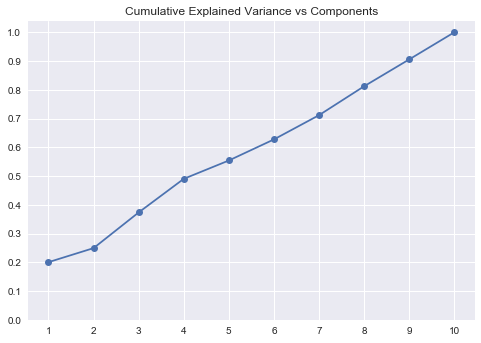

In [28]:
plt.plot([x+1 for x in range(len(prop_eig))], np.cumsum(prop_eig), '-o')

plt.yticks(np.linspace(0, 1, 11, endpoint=True))
plt.xticks(np.linspace(1, len(prop_eig), len(prop_eig), endpoint=True))
plt.title('Cumulative Explained Variance vs Components')

np.cumsum(prop_eig)

### For SVD

array([ 0.34683054,  0.47972292,  0.59747189,  0.68465208,  0.7612414 ,
        0.83657647,  0.89790073,  0.94425681,  0.97941282,  1.        ])

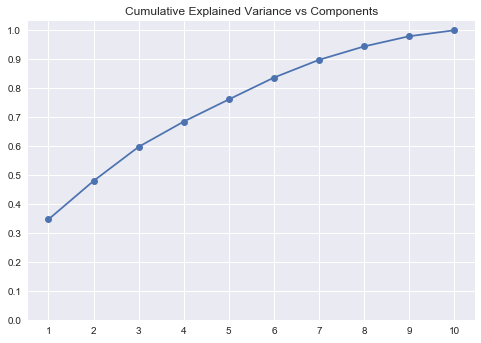

In [29]:
plt.plot([x+1 for x in range(len(prop_svd))], np.cumsum(prop_svd), '-o')

plt.yticks(np.linspace(0, 1, 11, endpoint=True))
plt.xticks(np.linspace(1, len(prop_svd), len(prop_svd), endpoint=True))
plt.title('Cumulative Explained Variance vs Components')

np.cumsum(prop_svd)

## PCA via `scikit-learn`

In [30]:
numpcs = len(list(filter(lambda x: x > 1.2, svd_s)))
numpcs

2

In [31]:
skl_pca = sklearn.decomposition.PCA(n_components=numpcs).fit(X_std)

print("Components:", skl_pca.components_)
print()
print("S:", skl_pca.singular_values_)
print()
print("Explained Variance: ", skl_pca.explained_variance_ratio_)

Components: [[ 0.24008529 -0.05611264  0.19139658  0.51912162  0.39227617  0.5038739
   0.06254945  0.17640522  0.1331196   0.41541419]
 [-0.54154171 -0.03810307 -0.03043738  0.27256339  0.3110207   0.20053942
  -0.47896398 -0.38300807 -0.23958291 -0.2441555 ]]

S: [ 451.7282567   355.40451654]

Explained Variance:  [ 0.20051728  0.1241204 ]


## Visualizing the Projected Data

In [32]:
W = eigvecs[:,:numpcs]

print("W_{}={}".format(numpcs, W))

W_2=[[ 0.24008529 -0.20450915]
 [-0.05611264  0.15997117]
 [ 0.19139658 -0.0548502 ]
 [ 0.51912162  0.62984492]
 [ 0.39227617 -0.04109114]
 [ 0.5038739  -0.67639614]
 [ 0.06254945  0.15495955]
 [ 0.17640522  0.04082675]
 [ 0.1331196  -0.0512804 ]
 [ 0.41541419  0.21298562]]


In [33]:
print(X_std.shape)
print(W.shape)

(101766, 10)
(10, 2)


In [34]:
X_proj = X_std.values @ W

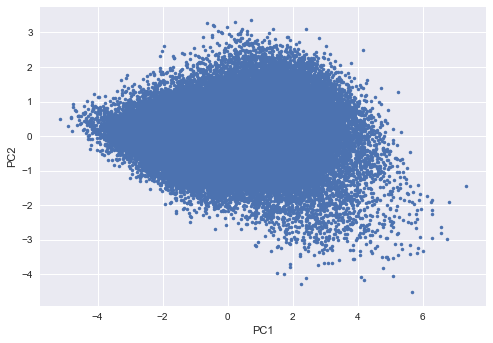

In [35]:
plt.plot(X_proj[:,0], X_proj[:,1], '.')
plt.xlabel('PC1')
plt.ylabel('PC2')


## Supervised Visualization

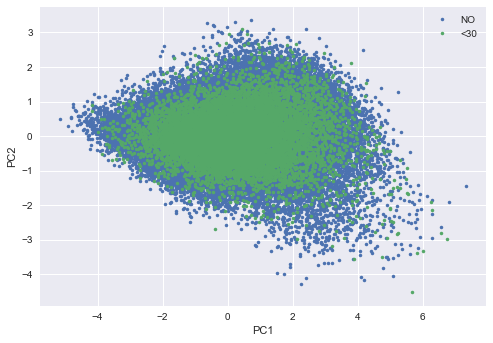

In [36]:
for readmitted_val in distinct_readmitted:
    plt.plot([X_proj[p, 0] for p in Y[Y.isin([readmitted_val])].index], 
             [X_proj[p, 1] for p in Y[Y.isin([readmitted_val])].index], 
             '.', label=readmitted_val)

    
plt.legend(loc='upper right')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Interpretting the Components

In [37]:
one = pd.Series(eigvecs[:, 0], index=X.columns)
one.sort_values(ascending=False)

time_in_hospital            0.519122
num_medications             0.503874
number_diagnoses            0.415414
num_lab_procedures          0.392276
age                         0.240085
discharge_disposition_id    0.191397
diag_2                      0.176405
diag_3                      0.133120
diag_1                      0.062549
admission_type_id          -0.056113
dtype: float64

In [38]:
two = pd.Series(eigvecs[:, 1], index=X.columns)
two.sort_values(ascending=False)

time_in_hospital            0.629845
number_diagnoses            0.212986
admission_type_id           0.159971
diag_1                      0.154960
diag_2                      0.040827
num_lab_procedures         -0.041091
diag_3                     -0.051280
discharge_disposition_id   -0.054850
age                        -0.204509
num_medications            -0.676396
dtype: float64